In [1]:
# The train_test_split function is for splitting a single dataset for two different
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from yahoo_fin.stock_info import get_data
import pandas as pd

In [3]:
df= get_data("XRT", start_date="12/04/1900", end_date="12/04/2022", index_as_date = False, interval="1wk")
df

,date,open,high,low,close,adjclose,volume,ticker
0,2006-06-19,18.530001,18.645000,18.459999,18.645000,15.217427,60200,XRT
1,2006-06-26,18.645000,18.855000,18.180000,18.809999,15.352092,1261200,XRT
2,2006-07-03,18.809999,18.809999,18.420000,18.530001,15.123562,658400,XRT
3,2006-07-10,18.655001,18.780001,17.605000,17.695000,14.442065,1967200,XRT
4,2006-07-17,17.730000,17.995001,17.290001,17.475000,14.262508,1646400,XRT
...,...,...,...,...,...,...,...,...
841,2022-08-01,63.310001,67.290001,62.919998,66.910004,66.910004,19704100,XRT
842,2022-08-08,67.500000,71.889999,66.349998,71.419998,71.419998,25004600,XRT
843,2022-08-15,70.989998,75.790001,69.029999,69.419998,69.419998,24278200,XRT
844,2022-08-22,68.180000,68.660004,67.059998,67.349998,67.349998,10425300,XRT


In [5]:
df= df.drop('ticker',axis=1)
df

KeyError: "['ticker'] not found in axis"

In [6]:
df = df[['date', 'close']]

df

,date,close
0,2006-06-19,18.645000
1,2006-06-26,18.809999
2,2006-07-03,18.530001
3,2006-07-10,17.695000
4,2006-07-17,17.475000
...,...,...
841,2022-08-01,66.910004
842,2022-08-08,71.419998
843,2022-08-15,69.419998
844,2022-08-22,67.349998


In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
# Get number of trained days in dataset
df.shape

(846, 2)

In [9]:
df.index = df.pop('date')
df

,close
date,
2006-06-19,18.645000
2006-06-26,18.809999
2006-07-03,18.530001
2006-07-10,17.695000
2006-07-17,17.475000
...,...
2022-08-01,66.910004
2022-08-08,71.419998
2022-08-15,69.419998


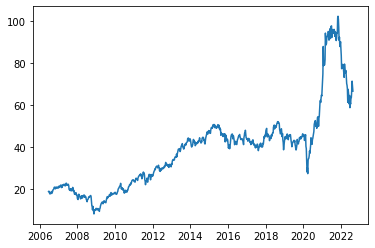

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['close'])

In [11]:
# Get the Close price
df = df[['close']]
df.head(10)

,close
date,
2006-06-19,18.645000
2006-06-26,18.809999
2006-07-03,18.530001
2006-07-10,17.695000
2006-07-17,17.475000
2006-07-24,17.645000
2006-07-31,17.945000
2006-08-07,17.705000
2006-08-14,18.670000


In [12]:
# creat a variable to Predict x days into the future
future_days = 10
# Create a new column target data - Predict values x days away from current price
df['Prediction'] = df[['close']].shift(-future_days)
df.head(10)

,close,Prediction
date,,
2006-06-19,18.645000,18.264999
2006-06-26,18.809999,18.500000
2006-07-03,18.530001,19.355000
2006-07-10,17.695000,19.530001
2006-07-17,17.475000,19.645000
2006-07-24,17.645000,20.110001
2006-07-31,17.945000,20.690001
2006-08-07,17.705000,20.434999
2006-08-14,18.670000,20.645000


In [13]:
# check the end shift
df.tail(10)

,close,Prediction
date,,
2022-06-27,58.730000,NaN
2022-07-04,61.230000,NaN
2022-07-11,60.490002,NaN
2022-07-18,63.759998,NaN
2022-07-25,63.610001,NaN
2022-08-01,66.910004,NaN
2022-08-08,71.419998,NaN
2022-08-15,69.419998,NaN
2022-08-22,67.349998,NaN


In [14]:
# Create a feature dataset and create a numpy array and remove the NaN days/rows 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 18.64500046]
 [ 18.80999947]
 [ 18.53000069]
 [ 17.69499969]
 [ 17.47500038]
 [ 17.64500046]
 [ 17.94499969]
 [ 17.70499992]
 [ 18.67000008]
 [ 17.75499916]
 [ 18.26499939]
 [ 18.5       ]
 [ 19.35499954]
 [ 19.53000069]
 [ 19.64500046]
 [ 20.11000061]
 [ 20.69000053]
 [ 20.43499947]
 [ 20.64500046]
 [ 19.92499924]
 [ 20.64500046]
 [ 20.64500046]
 [ 20.71500015]
 [ 20.26499939]
 [ 20.64500046]
 [ 20.79000092]
 [ 20.35000038]
 [ 20.30500031]
 [ 20.43000031]
 [ 21.22999954]
 [ 20.99500084]
 [ 20.69499969]
 [ 21.30500031]
 [ 21.36499977]
 [ 21.74500084]
 [ 21.71999931]
 [ 20.52499962]
 [ 20.79500008]
 [ 20.73500061]
 [ 21.70000076]
 [ 21.53000069]
 [ 21.89500046]
 [ 21.81999969]
 [ 22.18000031]
 [ 21.94000053]
 [ 21.50499916]
 [ 21.34499931]
 [ 21.44000053]
 [ 21.69000053]
 [ 22.65500069]
 [ 21.98500061]
 [ 22.01000023]
 [ 21.73500061]
 [ 21.64999962]
 [ 22.19499969]
 [ 21.98999977]
 [ 21.45000076]
 [ 19.65500069]
 [ 19.44000053]
 [ 19.48500061]
 [ 19.14999962]
 [ 20.00499916]
 [ 19.70

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [15]:
# Create target set
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[ 18.26499939  18.5         19.35499954  19.53000069  19.64500046
  20.11000061  20.69000053  20.43499947  20.64500046  19.92499924
  20.64500046  20.64500046  20.71500015  20.26499939  20.64500046
  20.79000092  20.35000038  20.30500031  20.43000031  21.22999954
  20.99500084  20.69499969  21.30500031  21.36499977  21.74500084
  21.71999931  20.52499962  20.79500008  20.73500061  21.70000076
  21.53000069  21.89500046  21.81999969  22.18000031  21.94000053
  21.50499916  21.34499931  21.44000053  21.69000053  22.65500069
  21.98500061  22.01000023  21.73500061  21.64999962  22.19499969
  21.98999977  21.45000076  19.65500069  19.44000053  19.48500061
  19.14999962  20.00499916  19.70999908  18.93499947  19.41500092
  19.82999992  19.45999908  20.61000061  20.27499962  18.69000053
  19.22999954  18.25        17.375       17.57999992  17.35499954
  17.69499969  18.11499977  16.98500061  17.20000076  16.98500061
  15.40499973  14.93500042  14.80500031  15.52999973  17.37000084
  16.70499

In [16]:
# train and test ratio is 75% traing and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [17]:
# Create models
# Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression Model
linr = LinearRegression().fit(x_train, y_train)

In [18]:
# Get x rows on future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[73.04000092],
       [70.26999664],
       [69.44999695],
       [67.72000122],
       [61.33000183],
       [67.51000214],
       [65.83000183],
       [63.56999969],
       [60.49000168],
       [64.56999969]])

In [19]:
# Prediction model for Decision Tree Regressor
tree_prediction = tree.predict(x_future)
print(x_future)

[[73.04000092]
 [70.26999664]
 [69.44999695]
 [67.72000122]
 [61.33000183]
 [67.51000214]
 [65.83000183]
 [63.56999969]
 [60.49000168]
 [64.56999969]]


In [20]:
# Prediction model for Linear Regression model
linear_prediction = linr.predict(x_future)
print(x_future)

[[73.04000092]
 [70.26999664]
 [69.44999695]
 [67.72000122]
 [61.33000183]
 [67.51000214]
 [65.83000183]
 [63.56999969]
 [60.49000168]
 [64.56999969]]


c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


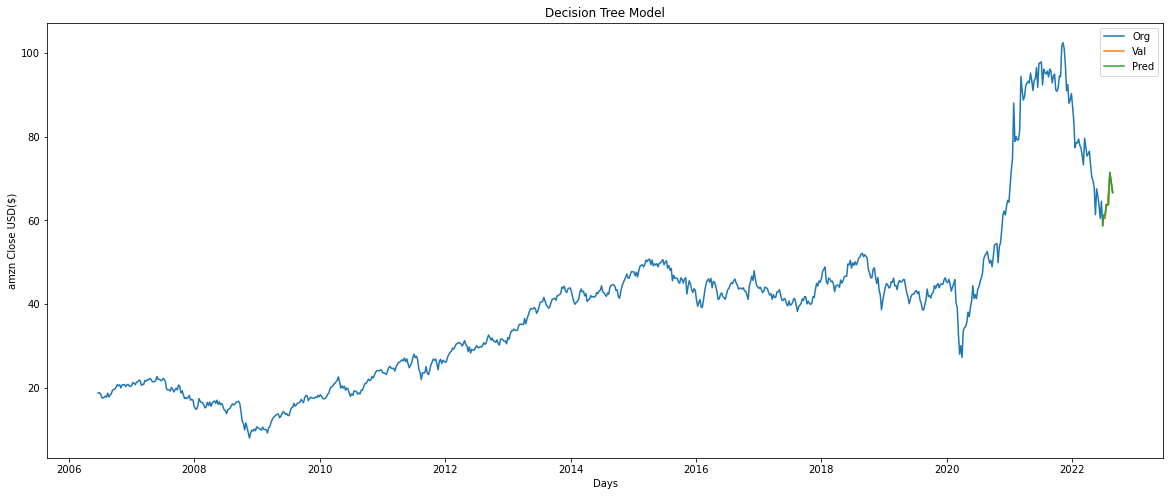

In [21]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (20, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('amzn Close USD($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


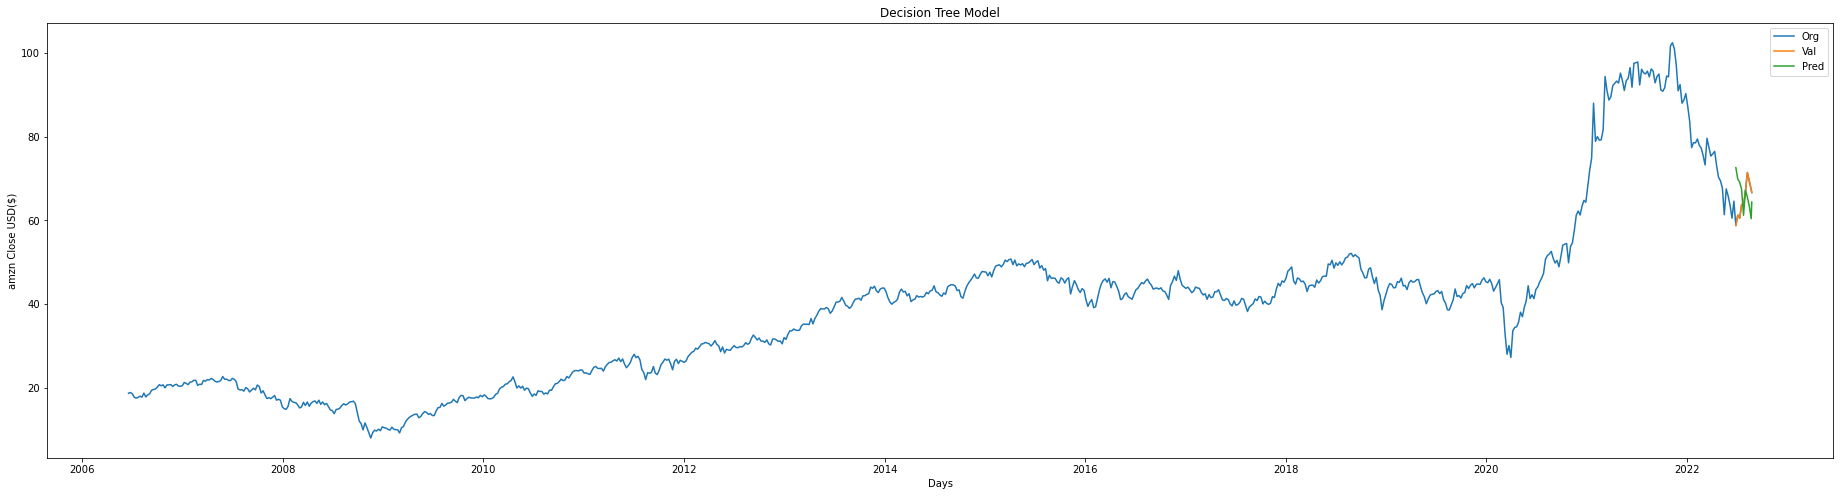

In [23]:
# Visualize the data 
predictions = linear_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('amzn Close USD($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()